In [1]:
import glob
import random
import pandas as pd
import numpy  as np
import tables as tb
from os.path import expandvars, join

from itertools import product

import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
outfilename = expandvars("$HOME/Software/WCSimFQTuningTools/LUTable/qdistributions.h5")
# outfilename = expandvars("$T2K_LUSTRE/LUTable/distributions/out/qdistributions_1.h5")

In [3]:
with tb.open_file(outfilename) as f:
    rbins     = f.root.rbins    .read()
    dphibins  = f.root.dphibins .read()
    thposbins = f.root.thposbins.read()
    thdirbins = f.root.thdirbins.read()

    # stats = f.root.stats.read()

In [4]:
with tb.open_file(outfilename) as f:
    rbins     = f.root.rbins    .read()
    dphibins  = f.root.dphibins .read()
    thposbins = f.root.thposbins.read()
    thdirbins = f.root.thdirbins.read()

    indices   = f.root.indices  .read()

bin_indices = np.array(list(product(range(len(rbins)    -1)
                                  , range(len(dphibins) -1)
                                  , range(len(thposbins)-1)
                                  , range(len(thdirbins)-1))))
nbins = len(bin_indices)

In [12]:
flatindex = np.random.randint(nbins)
bin       = bin_indices[flatindex]

r     =     rbins[bin[0]]
dphi  =  dphibins[bin[1]]
thpos = thposbins[bin[2]]
thdir = thdirbins[bin[3]]

with tb.open_file(outfilename) as f:
    qs = f.root.charges[indices[flatindex]]

/scratch/users/g/gdiazlop/ipykernel_902978/2956052041.py:6: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


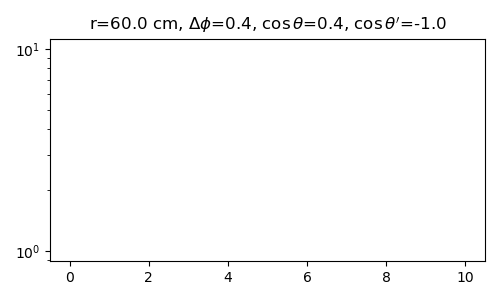

In [13]:
plt.figure(figsize=[5, 3])
plt.title(rf"r={r} cm, $\Delta\phi$={round(dphi, 2)}, $\cos\theta$={round(thpos, 2)}, $\cos\theta'$={round(thdir, 2)}")

plt.hist(qs, bins=np.linspace(0, 10., 100), histtype="step")

plt.yscale("log")
plt.tight_layout()

In [14]:
statsarray = np.zeros((len(rbins)-1, len(dphibins)-1, len(thposbins)-1, len(thdirbins)-1), dtype=int)

with tb.open_file(outfilename) as f:
    charges = f.root.charges

    for i, qs in enumerate(charges):
        statsarray[tuple(bin_indices[indices[i]])] = len(qs)

In [17]:
with_stats = np.argwhere(statsarray != 0)

print("  r  | dphi | thpos | thdir")
for i in with_stats:
    r   = str(round(    rbins[i[0]]   )).ljust(3).rjust(5)
    dp  = str(round( dphibins[i[1]], 2)).ljust(3).rjust(5)
    thp = str(round(thposbins[i[2]], 2)).ljust(4).rjust(6)
    thd = str(round(thdirbins[i[3]], 2)).ljust(5).rjust(7)
    print(r, dp, thp, thd)

  r  | dphi | thpos | thdir
  0     0.0   -1.0   -0.4 
  0     0.0   -1.0   -0.2 
  0     0.0   -1.0   0.0  
  0     0.0   -1.0   0.2  
  0     0.0   -0.8   -0.4 
  0     0.0   -0.8   -0.2 
  0     0.0   -0.8   0.0  
  0     0.0   -0.8   0.2  
  0     0.0   -0.6   -0.4 
  0     0.0   -0.6   -0.2 
  0     0.0   -0.6   0.0  
  0     0.0   -0.6   0.2  
  0     0.0   -0.4   -0.4 
  0     0.0   -0.4   -0.2 
  0     0.0   -0.4   0.0  
  0     0.0   -0.4   0.2  
  0     0.0   -0.2   -0.4 
  0     0.0   -0.2   -0.2 
  0     0.0   -0.2   0.0  
  0     0.0   -0.2   0.2  
  0     0.0   0.0    -0.4 
  0     0.0   0.0    -0.2 
  0     0.0   0.0    0.0  
  0     0.0   0.0    0.2  
  0     0.0   0.2    -0.6 
  0     0.0   0.2    -0.4 
  0     0.0   0.2    -0.2 
  0     0.0   0.2    0.0  
  0     0.0   0.2    0.2  
  0     0.0   0.4    -0.4 
  0     0.0   0.4    -0.2 
  0     0.0   0.4    0.0  
  0     0.0   0.4    0.2  
  0     0.0   0.6    -0.4 
  0     0.0   0.6    -0.2 
  0     0.0   0.6    0.0  


In [7]:
rbini     = -2
dphibini  = np.random.randint(len(dphibins) -1)
thposbini = np.random.randint(len(thposbins)-1)
thdirbini = np.random.randint(len(thdirbins)-1)

Nmax = 10

nentries = 0
for i, filename in enumerate(filenames, 1):
    
    print(f"Processing file {i}/{len(filenames)}", end="\r")

    with tb.open_file(filename) as f:
        stats   = f.root.stats
        charges = f.root.charges

        n  = stats[rbini, dphibini, thposbini, thdirbini]
        nentries += n
        qs = charges[rbini, dphibini, thposbini, thdirbini]
        # qs = qs[:n]

    if (nentries == 0)&(nentries >= Nmax):
        break

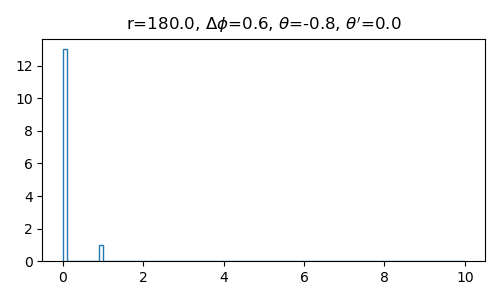

In [24]:
# choose a bin and get charges
# rbini   = np.random.randint(len(rbins)-1)
rbini     = -2
dphibini  = np.random.randint(len(dphibins) -1)
thposbini = np.random.randint(len(thposbins)-1)
thdirbini = np.random.randint(len(thdirbins)-1)

with tb.open_file(filenames[0]) as f:
    stats     = f.root.stats    .read()
    charges   = f.root.charges
    qs = charges[rbini, dphibini, thposbini, thdirbini]

plt.figure(figsize=[5, 3])
plt.title(rf"r={rbins[rbini]}, $\Delta\phi$={round(dphibins[dphibini],2)}, $\theta$={round(thposbins[thposbini],2)}, $\theta'$={round(thdirbins[thdirbini],2)}")

plt.hist(qs, bins=np.linspace(0, 10., 100), histtype="step")

plt.tight_layout()

In [3]:
filename = expandvars("$HOME/Software/WCSimFQTuningTools/LUTable/charge_distributions_200.0.h5")
f = tb.open_file(filename)

rbins     = f.root.rbins    .read()
dphibins  = f.root.dphibins .read()
thposbins = f.root.thposbins.read()
thdirbins = f.root.thdirbins.read()
stats     = f.root.stats    .read()
charges   = f.root.charges

HDF5ExtError: HDF5 error back trace

  File "H5F.c", line 836, in H5Fopen
    unable to synchronously open file
  File "H5F.c", line 796, in H5F__open_api_common
    unable to open file
  File "H5VLcallback.c", line 3863, in H5VL_file_open
    open failed
  File "H5VLcallback.c", line 3675, in H5VL__file_open
    open failed
  File "H5VLnative_file.c", line 128, in H5VL__native_file_open
    unable to open file
  File "H5Fint.c", line 2027, in H5F_open
    unable to read root group
  File "H5Groot.c", line 219, in H5G_mkroot
    can't check if symbol table message exists
  File "H5Omessage.c", line 789, in H5O_msg_exists
    unable to protect object header
  File "H5Oint.c", line 1002, in H5O_protect
    unable to load object header
  File "H5AC.c", line 1277, in H5AC_protect
    H5C_protect() failed
  File "H5Centry.c", line 3125, in H5C_protect
    can't load entry
  File "H5Centry.c", line 1189, in H5C__load_entry
    incorrect metadata checksum after all read attempts
  File "H5Ocache.c", line 187, in H5O__cache_get_final_load_size
    can't deserialize object header prefix
  File "H5Ocache.c", line 1100, in H5O__prefix_deserialize
    bad object header version number

End of HDF5 error back trace

Unable to open/create file '/pbs/home/g/gdiazlop/Software/WCSimFQTuningTools/LUTable/charge_distributions_200.0.h5'

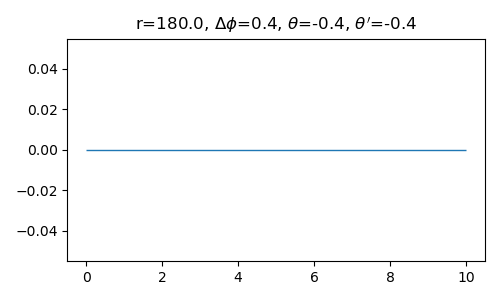

In [47]:
# choose a bin and get charges
# rbini   = np.random.randint(len(rbins)-1)
rbini     = -2
dphibini  = np.random.randint(len(dphibins) -1)
thposbini = np.random.randint(len(thposbins)-1)
thdirbini = np.random.randint(len(thdirbins)-1)

qs = charges[rbini, dphibini, thposbini, thdirbini]

plt.figure(figsize=[5, 3])
plt.title(rf"r={rbins[rbini]}, $\Delta\phi$={round(dphibins[dphibini],2)}, $\theta$={round(thposbins[thposbini],2)}, $\theta'$={round(thdirbins[thdirbini],2)}")

plt.hist(qs, bins=np.linspace(0, 10., 100), histtype="step")

plt.tight_layout()

In [11]:
print(stats.sum(axis=(1, 2, 3)))
rbins

[  10   89  252  483  805 1083 1471 1926 2118 2263]


array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.])

In [59]:
N = np.prod(stats.shape)
n = np.sum(stats)

print(n/N)

1.1053


In [21]:
1000 / 10 / 10 / 2 / 2

2.5

In [ ]:
K = np.sqrt(p**2 + m**2) - m